# Polinomios

## Método de Neville

In [4]:
# importar bibliotecas
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def Neville(x,y,n,t):
    P = np.zeros([n+1,n+1])
    P[:,0] = np.copy(y)
    for j in range(1,n+1):
        for i in range(j,n+1):
            P[i,j] = ((t-x[i-j])*P[i,j-1] - (t-x[i])*P[i-1,j-1])/(x[i]-x[i-j])
    return P[n,n], P

In [6]:
# definir nodos
x = np.array([-1,4,5],dtype=float)
y = np.array([15,5,9],dtype=float)
x,y

(array([-1.,  4.,  5.]), array([15.,  5.,  9.]))

In [7]:
n = len(x) - 1
t = 2
pt, P = Neville(x,y,n,t)
pt, P

(3.0,
 array([[15.,  0.,  0.],
        [ 5.,  9.,  0.],
        [ 9., -3.,  3.]]))

In [8]:
# método de Neville vectorizado
def vecNeville(x,y,n,ts):
    pts = np.zeros_like(ts)
    for i in range(len(pts)):
        pts[i], P = Neville(x,y,n,ts[i])
    return pts

In [9]:
def plotNeville(x,y,n,pts=100):
    # obtener abcisas y ordenadas
    t = np.linspace(np.min(x), np.max(x), pts)
    Pt = vecNeville(x,y,n,t)

    # graficar polinomio interpolante
    plt.plot(t,Pt)
    # graficar nodos
    plt.plot(x,y,"o")

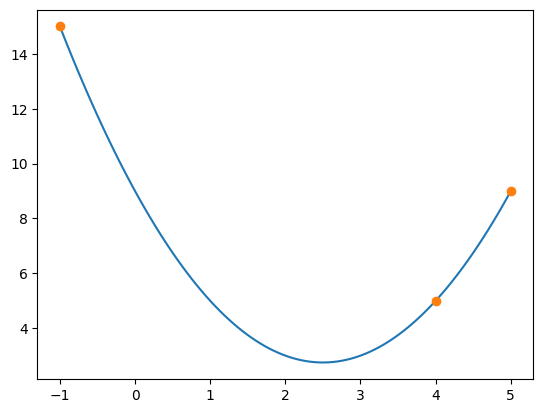

In [10]:
plotNeville(x,y,n)